# Portfolio assignment week 6

Decision Trees are a popular supervised machine learning technique that may be used for both classification and regression applications. They are graphical representations of a set of judgments or rules used to create predictions.

Each internal node in a Decision Tree represents a feature or attribute, and each branch represents a possible value or outcome of that feature. The tree's leaves symbolize the final prognosis or verdict. The tree structure is built iteratively by partitioning the data based on distinct feature values until a halting requirement is fulfilled.

task:
    build decision Tree

We are going to use GaussianNB and DT for predicting the classes and building a tree

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
import yaml
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB


# Data
We are using cancer data from the previous study.

Checks:
- normality
- nan values
- correlation
- shape of the data


In [21]:
# load the data in with the config file
with open("config.yml") as config:
    input_files = yaml.safe_load(config)
    df = pd.read_csv(input_files["cancer"])

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
NAN = df.isna().sum().sum()
row = df.shape[0]
col = df.shape[1]
skewness = df.skew()
print(f'the amount of rows: {row}, the amount of columns: {col}')
print(f'amount of NAN values:{NAN}')
print('Classes in the data',df["diagnosis"].unique())
# print(f"skewness number:{skewness}") # comment out because of clutter

the amount of rows: 569, the amount of columns: 32
amount of NAN values:0
Classes in the data ['M' 'B']


C:\Users\marsh\AppData\Local\Temp\ipykernel_16188\3523846205.py:4: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()


#### Normality check

In [23]:
# filter the two diagnosis for plotting later
B_df_col = df.loc[df["diagnosis"] == "B"]
M_df_col = df.loc[df["diagnosis"] == "M"]

B_df_col = B_df_col.drop(columns=["diagnosis","id"])
M_df_col = M_df_col.drop(columns=["diagnosis","id"])

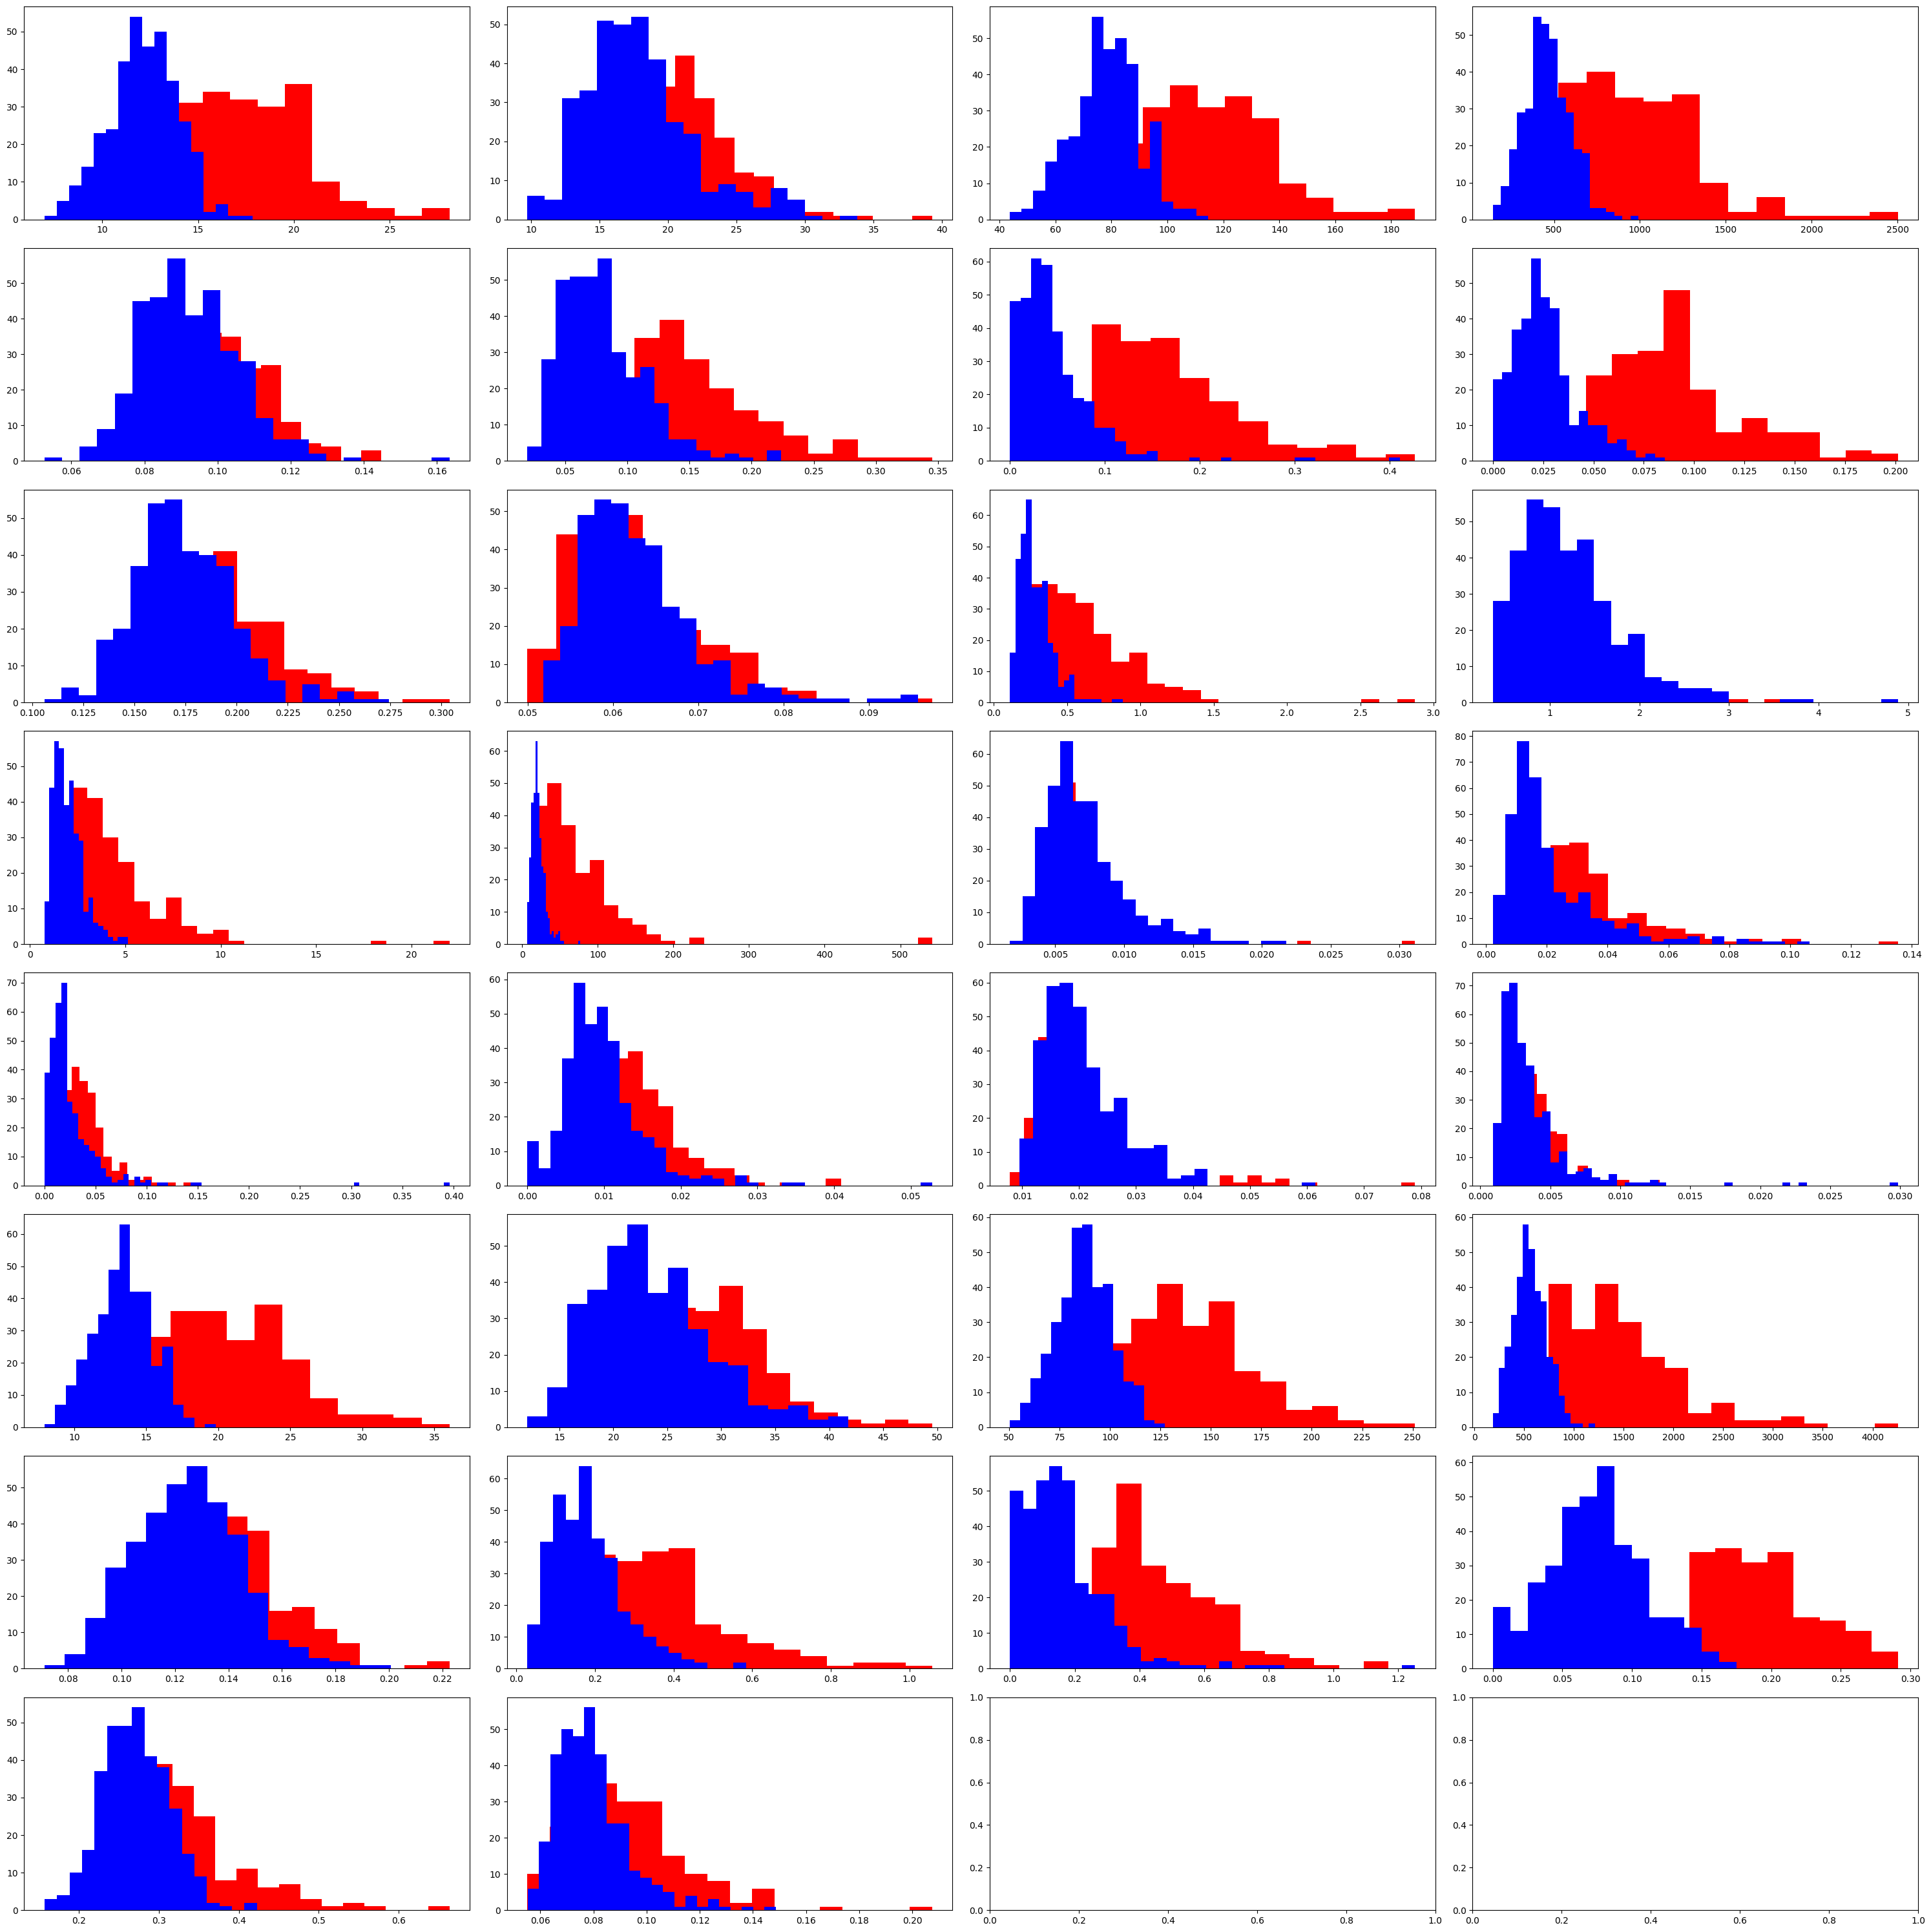

In [24]:
# check normality

num_cols = 4  # Number of columns in the grid
num_rows = 8 # Number of rows in the grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 30))

axes = axes.flatten()
c=0 
for c1 in M_df_col.columns:
    try:
        axes[c].hist(M_df_col[c1],bins="auto",color ="red")
        axes[c].hist(B_df_col[c1],bins="auto",color ="blue")
        c+=1
    except: IndexError
# blue will be the beneign because it is not as harmfull and red will be the malignant cause you know it is deadly
plt.tight_layout()
plt.show()


The normalcy appears to be adequate; it is not outstanding, but it is also not deplorable.

# Scale/ Split/ Training/ Predicting

We will scale the data, then partition it, train with both models, and finally predict and build a tree (an apple tree). 

In [25]:
# preprosessing: scaling, splitting.
y = df["diagnosis"]
X = df.drop(columns=["diagnosis","id"])
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [26]:
# set training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y)

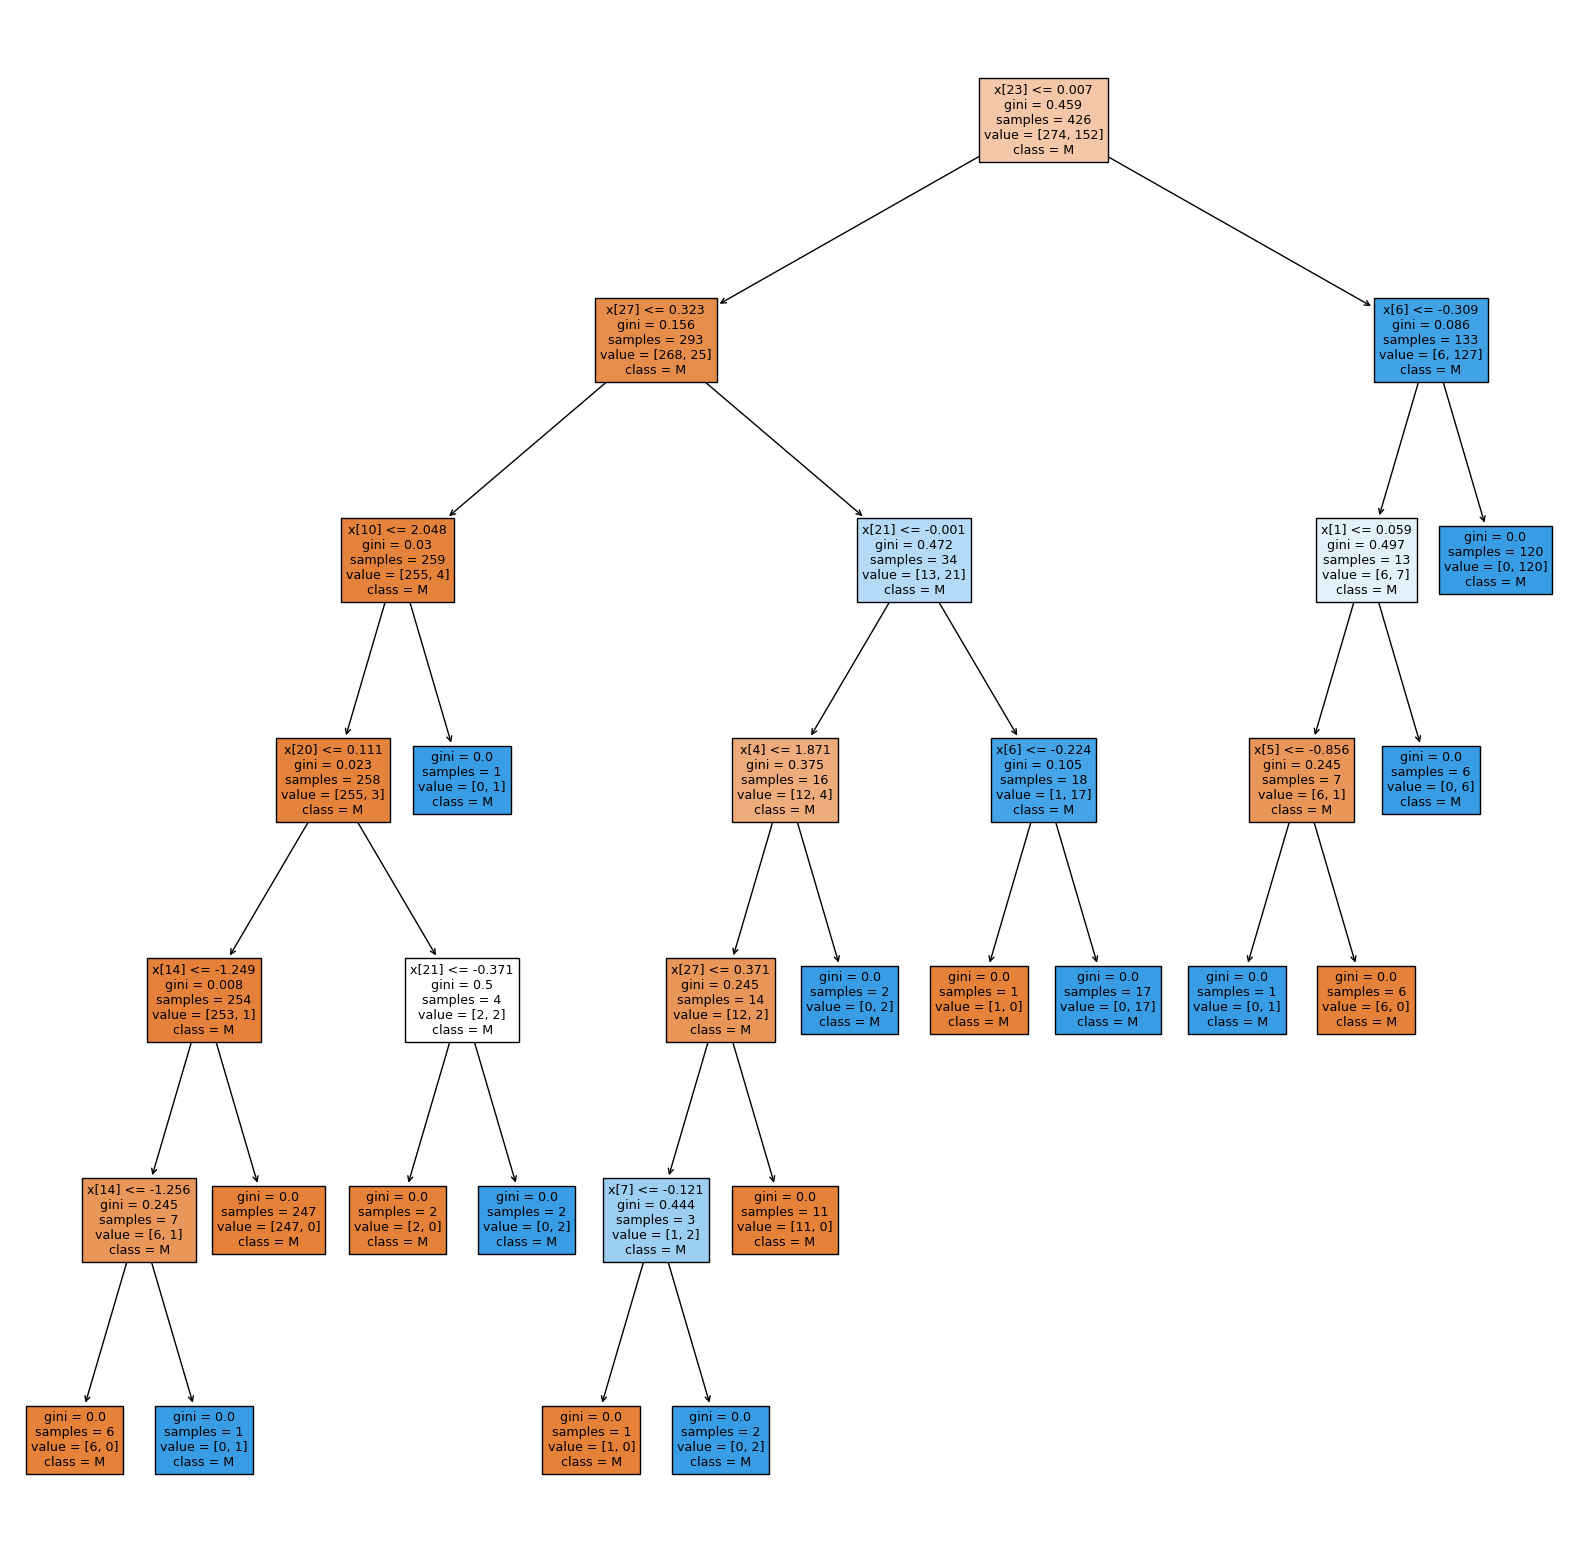

In [29]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
# plot die ding
plt.figure(figsize=(20, 20))
tree.plot_tree(
    dt,
    class_names = df.diagnosis,
    filled=True,
    rounded=False,
)
plt.show()

# Tree explanation

The tree is built from multiple choices based on the values in the columns. The options are displayed as the tree's first value. If the detected value in the column is less than or equal to the value in the tree, the cursor moves one step down the tree. This procedure is done until the type of object is established. Our tree appears strange since it always trusts object ids from the class "M". This is odd because the "B" class is also included in the data but will never be predicted using this tree.

# GaussianNB

In [30]:
# use baiyes stats.
gaus = GaussianNB()
gaus.fit(X_train,y_train)

GaussianNB()

In [33]:
gaus_pred = gaus.predict(X_test)
dt_pred = dt.predict(X_test)
print("Gaus :")
print(confusion_matrix(gaus_pred,y_test))
print(" ")
print("Tree:")
print(confusion_matrix(dt_pred,y_test))

Gaus :
[[77  5]
 [ 6 55]]
 
Tree:
[[80  3]
 [ 3 57]]


The confusion matrices display the number of false positives, true positives, false negatives, and true negatives.
The grid looks like this:

TP |FP
---|---
FN |TN

Based on this, we can conclude that the tree is more accurate at predicting. This is odd because the tree itself does not appear to be in good condition.


In [34]:
gaus_plot = RocCurveDisplay.from_estimator(gaus, X_test, y_test)
plt.close()
dt_plot = RocCurveDisplay.from_estimator(dt, X_test, y_test)
plt.close()

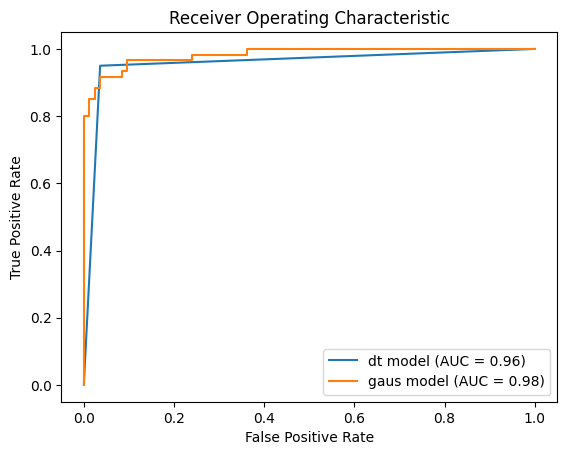

In [35]:
# Plot the ROC curves on the same axis
fig, ax = plt.subplots()
dt_plot.plot(ax=ax, name='dt model')
gaus_plot.plot(ax=ax, name='gaus model')


# Add labels and a legend
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic')
ax.legend()

# Display the plot
plt.show()

# Conclusion
Following the trend established by the tree discussion. The tree-based method is unusual, but it is quite good at predicting object types. Gaus prediction is superior in general.
GaussianNB computes the likelihood of each feature value for each class using the Gaussian distribution assumption. Using the training data, it calculates the mean and variance of each feature for each class. GaussianNB is both simple and efficient in terms of computing. It has modest memory needs and can efficiently handle huge datasets.
GaussianNB performs effectively on small and medium-sized datasets when the assumption of feature independence holds pretty well. It can deal with continuous features and is resistant to irrelevant ones.